<a href="https://colab.research.google.com/github/andrea0026/Precios-de-casas/blob/main/ejercicio_kaggel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [ ]:
# Get data
df = pd.read_csv('/content/drive/MyDrive/Data_science/Machine learning/redes neuronales/archivos/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#visualizando datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.duplicated().any()

False

In [ ]:
#Eliminar columnas con muy poca información
df.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis = 1, inplace = True)

In [ ]:
df.shape

(1460, 76)

In [ ]:
# dividir en x y

X = df.drop(columns = 'SalePrice')
y = df['SalePrice']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#escalar los datos
scaler = StandardScaler()

# aplicar metodo de imputación
num_sel = make_column_selector(dtype_include='number')
cat_sel =make_column_selector(dtype_include='object')

missing = SimpleImputer(strategy='most_frequent')
zero = SimpleImputer(strategy='mean')

# one hot encoder para los datos categoricos
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# crear pipeline
cat_pipe = make_pipeline(missing, ohe)
num_pipe = make_pipeline(zero, scaler)
num_tup = (num_pipe, num_sel)
cat_tup = (cat_pipe, cat_sel)

preprocessor = make_column_transformer(num_tup, cat_tup, remainder='passthrough')

In [ ]:
# Preprocesar los datos
preprocessor.fit(X_train, y_train)
# Creating X_trained and X_test processed
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [ ]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_proc).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_proc).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_proc.dtype)
print('All data in X_test_processed are', X_test_proc.dtype)
print('\n')
print('shape of data is', X_train_proc.shape)

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (1095, 267)


In [ ]:
#aplicar potenciacion del gradiente con LightGBM
# Instantiate and fit gradient boosting classifier
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train_proc, y_train)

LGBMRegressor()

In [ ]:
#Evaluar el modelo
print('Training accuracy:', lgbm.score(X_train_proc, y_train))
print('Testing accuracy:', lgbm.score(X_test_proc, y_test))

Training accuracy: 0.979221693315628
Testing accuracy: 0.8875603117602796


## Ahora utilizando una red neuronal,

In [ ]:
input_shape = X_train_proc.shape[1]
input_shape

267

In [ ]:
#Definir el tipo de modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Sequential model
model = Sequential()

In [ ]:
# agregar capas ocultas (3)

# primer capa
model.add(Dense(267, 
                input_dim = input_shape, 
                activation = 'relu'))
model.add(Dropout(0.2))
# segunda capa
model.add(Dense(100, 
                activation = 'relu'))
model.add(Dropout(0.2))
# tercer capa
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dropout(0.2)) 

In [ ]:
#agregar la capa de salida
model.add(Dense(1, activation = 'linear'))

In [ ]:
# paso 2: compilar el modelo, especificar funcion de perdida mse
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
#Paso 3: ajustar el modelo
history = model.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test), 
                    epochs=20)

Epoch 1/20
35/35 [==============================] - 1s 10ms/step - loss: 39083737088.0000 - val_loss: 38855827456.0000
Epoch 2/20
35/35 [==============================] - 0s 7ms/step - loss: 38962475008.0000 - val_loss: 38544080896.0000
Epoch 3/20
35/35 [==============================] - 0s 5ms/step - loss: 38183858176.0000 - val_loss: 37086138368.0000
Epoch 4/20
35/35 [==============================] - 0s 5ms/step - loss: 35603939328.0000 - val_loss: 33091461120.0000
Epoch 5/20
35/35 [==============================] - 0s 7ms/step - loss: 29823911936.0000 - val_loss: 25397966848.0000
Epoch 6/20
35/35 [==============================] - 0s 7ms/step - loss: 20639823872.0000 - val_loss: 14792732672.0000
Epoch 7/20
35/35 [==============================] - 0s 6ms/step - loss: 10912811008.0000 - val_loss: 6258511360.0000
Epoch 8/20
35/35 [==============================] - 0s 7ms/step - loss: 5839813632.0000 - val_loss: 3131942144.0000
Epoch 9/20
35/35 [==============================] - 0s 6ms

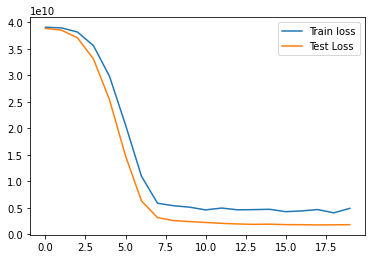

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
#Evaluar el modelo
print('Training score:', model.evaluate(X_train_proc, y_train))
print('Testing score:', model.evaluate(X_test_proc, y_test))

35/35 [==============================] - 0s 3ms/step - loss: 1600031616.0000
Training score: 1600031616.0
12/12 [==============================] - 0s 6ms/step - loss: 1791389184.0000
Testing score: 1791389184.0


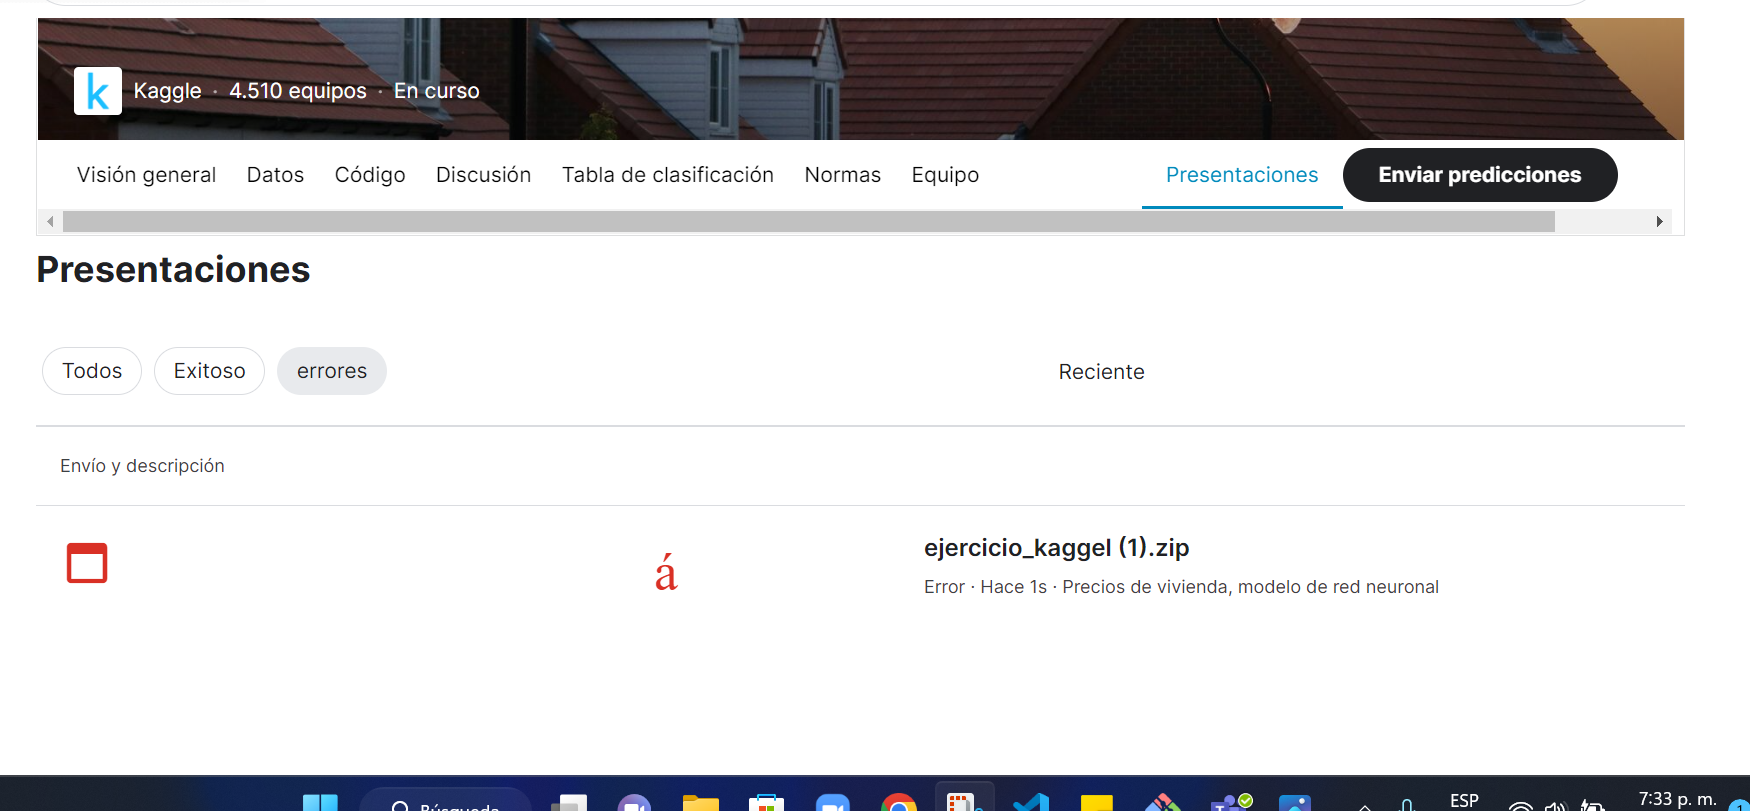